## Double well bound states

Let the potential be $-V_0$ between $x = -a/2$ to $x = -b/2$ and $x = b/2$ to $x = a/2$ and zero elsewhere. 

Natural length scale, $l_0 = a$
Then 
$$\tilde{b} = \frac{b}{a}$$

$x = l_0y$ and $V = E_0 U(y)$

$$E_0 = \frac{\hbar^2}{2ml_0^2} = \frac{\hbar^2}{2ma^2}$$ 
And
$$U(y) = \begin{cases}
\frac{-V_0}{E_0} & -\frac{1}{2} < y < -\frac{\tilde{b}}{2} \\
0 & -\frac{\tilde{b}}{2} < y < \frac{\tilde{b}}{2} \\
\frac{-V_0}{E_0} & \frac{\tilde{b}}{2} < y < \frac{1}{2} \\
0 & |y| > \frac{1}{2}
\end{cases}$$

We are free to manipulate $\tilde{b}$ and $U_0 = V_0/E_0$

In [137]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as alg
plt.style.use('seaborn-whitegrid')

In [138]:
def kro(i,j):
    return 1 if i==j else 0

def U(ys,i):
    return -U0 if abs(ys[i])>=b/2 and abs(ys[i])<= 0.5 else 0 

def H_ele(i,j,dy,ys): 
    return (-kro(i+1,j) + 2*kro(i,j) -kro(i-1,j))/dy**2  + U(ys,i)*kro(i,j)

In [139]:
dy = 0.01 # discretization of space
y_lim = 6.0 # yspace half-width
U0 = 100.0 # V0/E0
b = 0.9

ys = np.arange(-y_lim,y_lim,dy) # space points
N = len(ys)
print(N)
H = [[H_ele(i,j,dy,ys) for i in range(N)] for j in range(N)] # Hamiltonian N*N matrix
#print(H)

1200


In [140]:
H_eigs, H_eigvs = alg.eig(H)


H_eigvalues = np.sort(H_eigs) # sorted eigenvalues
H_eigvectors = [] # to hold sorted eigenvectors

# loop to arrange eigenvectors in corresponding order of sorted eigenvalues #
for i in range(N):
    for j in range(N):
        if H_eigs[j] == H_eigvalues[i]:
            H_eigvectors.append(H_eigvs[:,j])
            continue

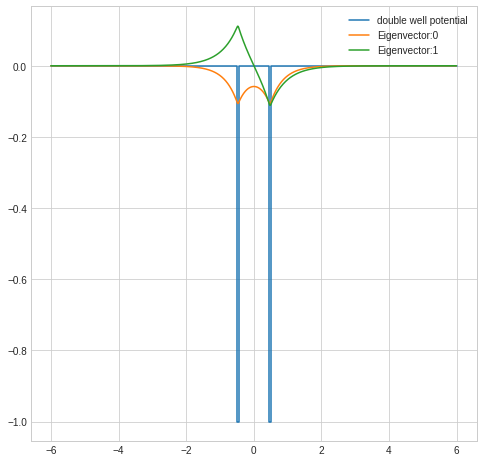

In [145]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

ax.plot([-y_lim,-0.5,-0.5,-b/2,-b/2,b/2,b/2,0.5,0.5,y_lim],[0,0,-U0*dy,-U0*dy,0,0,-U0*dy,-U0*dy,0,0],label = 'double well potential')

for i in range(0,2):
    ax.plot(ys,H_eigvectors[i],label = 'Eigenvector:%d'%i)
ax.legend()

In [142]:
psi = H_eigvectors[0]
psi1 = H_eigvectors[1]
np.dot(psi.conj().T, psi1)

1.4889971647704704e-12

In [143]:
print(H_eigvalues[0:9])

for i in range(len(H_eigvalues)):
    if H_eigvalues[i]<=0 and H_eigvalues[i+1]>=0:
        neg = i
        break
    else:
        continue

[-6.80639569 -4.28020443  0.34729236  0.36883407  1.37768324  1.45643112
  3.06241472  3.22590129  5.36259977]


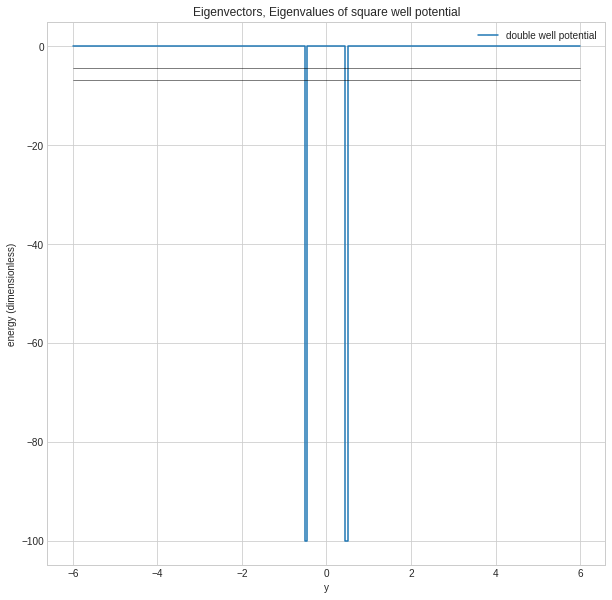

In [144]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
ax.plot([-y_lim,-0.5,-0.5,-b/2,-b/2,b/2,b/2,0.5,0.5,y_lim],[0,0,-U0,-U0,0,0,-U0,-U0,0,0],label = 'double well potential')
for i in range(0,neg+1):
    #ax.plot(ys,H_eigvectors[i],label = 'Eigenvector:%d'%i)
    ax.plot([-y_lim, y_lim],[H_eigvalues[i],H_eigvalues[i]],color = 'black',linewidth = 0.5)
ax.set(xlabel = 'y', ylabel = 'energy (dimensionless)', title = 'Eigenvectors, Eigenvalues of square well potential')
ax.legend()  